<a href="https://colab.research.google.com/github/Rohit0994/Mobile-Price-Range-Prediction--Classification/blob/main/Mobile_Price_Range_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  - Mobile Price Range Prediction

#### **Project Type**    - **Classification**
#### **Contribution**    - **Team**
#### **Team Member 1 -** - **Rohit Sharma**
#### **Team Member 2 -** - **Piyush Sirotha**

# **GitHub Link -**
##### https://github.com/Rohit0994/Mobile-Price-Range-Prediction--Classification

# **Problem Description**

#### Nowadays, a Mobile phone is an essential accessory of a person. It is the fastest evolving and moving product in the technology market space. New mobiles with updated versions and new features are introduced into the market at a rapid pace. Thousands of mobiles are sold each day. The first step in fixing a price is to estimate the price based on the features. The objective this research is to develop an ML model capable of estimating the price of a mobile phone based on its features. This approach to create a prediction model can be used to develop a price estimation model for most products that have similar independent variable parameters. The price of a mobile is dependent on many features for example, the processor, battery capacity, camera quality, display size and thickness, etc. These features can be used to classify phones into various categories like entry-level, mid-range, flagship, premium, etc. Supervised Classification ML algorithms are used, as the dataset used has a definitive class label for price range. 

## <b> Data Description </b>

##- <b>Dataset</b> - data_mobile_price_range.csv


* #### Battery_power - Total energy a battery can store in one time measured in mAh
* #### Blue - Has bluetooth or not
* #### Clock_speed - speed at which microprocessor executes instructions
* #### Dual_sim - Has dual sim support or not
* #### Fc - Front Camera mega pixels
* #### Four_g - Has 4G or not
* #### Int_memory - Internal Memory in Gigabytes
* #### M_dep - Mobile Depth in cm
* #### Mobile_wt - Weight of mobile phone
* #### N_cores - Number of cores of processor
* #### Pc - Primary Camera mega pixels
* #### Px_height - Pixel Resolution Height
* #### Px_width - Pixel Resolution Width
* #### Ram - Random Access Memory in Mega Byte
* #### Touch_screen - Has touch screen or not
* #### Wifi - Has wifi or not
* #### Sc_h - Screen Height of mobile in cm
* #### Sc_w - Screen Width of mobile in cm
* #### Talk_time - longest time that a single battery can last over a call
* #### Three_g - Has 3G or not
* #### Wifi - Has wifi or not
* #### Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

##1.Business Problem

####In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


## 2.Data Collection and Preprocessing

####(i). Importing the libraries

In [165]:
#Importing important libraries and modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Accuracy classification score
from sklearn.metrics import confusion_matrix, accuracy_score

# Predictive models to acheive better accuracy and model stability
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier as xgb

# To measure the quality of a split
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

#Univariate imputer for completing missing values with simple strategies

from sklearn.impute import SimpleImputer

# Allows you to control the display of warning messages
import warnings    
warnings.filterwarnings('ignore')

In [166]:
#Loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
#Reading CSV FILE
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project csv files/Classification/data_mobile_price_range.csv")



####(ii).Understanding the data

In [168]:
#Mobile Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [169]:
#Shape of the dataset
df.shape

#total 2000 Observation and 21 Coulums/Features

(2000, 21)

In [170]:
#information about the mobile price range dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Here we can see there is no Null/Missing values in dataset and all the features are containing numerical values.

In [171]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

##### THERE IS NO DUPLICATES VALUES IN OUR DATASET

In [172]:
# Total Unique values in each columns of our dataframe
df.nunique()              

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [173]:
# Creating a categorical column list 
categorical_variables = ['blue','dual_sim','four_g','m_dep','n_cores','three_g','touch_screen','wifi',
                         'price_range']

In [174]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for blue: [0 1]
Unique values for dual_sim: [0 1]
Unique values for four_g: [0 1]
Unique values for m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values for n_cores: [2 3 5 6 1 8 4 7]
Unique values for three_g: [0 1]
Unique values for touch_screen: [0 1]
Unique values for wifi: [1 0]
Unique values for price_range: [1 2 3 0]


In [175]:
num_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
cat_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

In [176]:
# description of the data
df.describe().T  #Transpose

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


##### Here we can see in "px_height and sc_w" column the minimum value is zero which cant be possible so that we have to handle it


In [177]:
# Total number of phones having sc_w = 0
print(len(df[df.sc_w==0]))
#Total number of phones having px_height = 0
print(len(df[df.px_height==0]))


180
2


In [178]:
# lets assign the Mean values where the values are zero
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height==0].index]=df.px_height.mean()


# df['sc_w'][df[df.sc_w == 0].index]  ---->  selects the 'sc_w' column for all rows where 'sc_w' is equal to 0.
# df.sc_w.mean() --->  calculates the mean of non-zero values in the 'sc_w' column.

##2.Exploratory Data Analysis - EDA




## 1. Univariate Analysis
summarize only one variable at a time

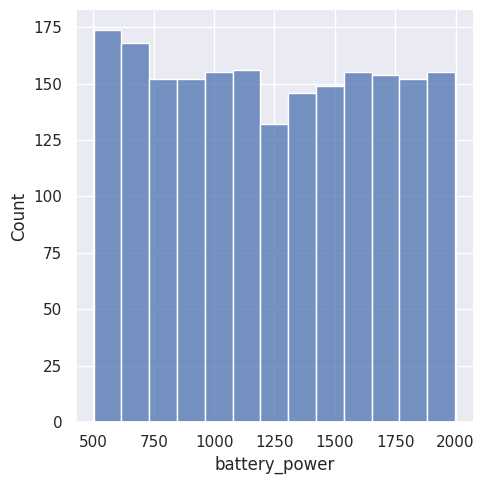

In [179]:
# 1. Battery power

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(df["battery_power"])
plt.show()
     

**Why this graph** - To see the increase and decrease of Battery power with respect to count.

**Insight** - This plot shows how the battery mAH spread, and we can see that 500 MAH battery power phones are more in comparision to others.


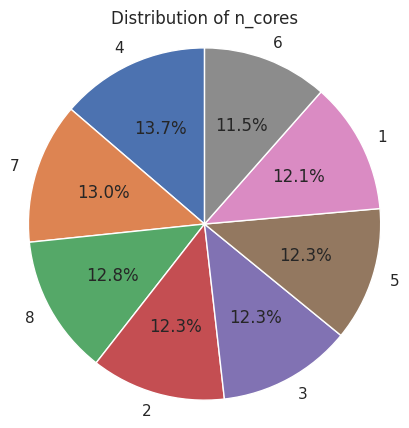

In [180]:
# 2. N-cores

# Pie chart for Number of cores of processor
counts = df["n_cores"].value_counts()

# Creating a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Distribution of n_cores")

# Displaying the chart
plt.axis('equal') # This ensures that the pie chart is circular
plt.show()

**Why Pie chart**- Helps to organize and show data as a percentage of a whole.

**Insight** - Here we can see that where n_cores=4 and 7 having more percentage , means they are in demand

##2.  Bi- Variate analysis

<Axes: xlabel='blue', ylabel='price_range'>

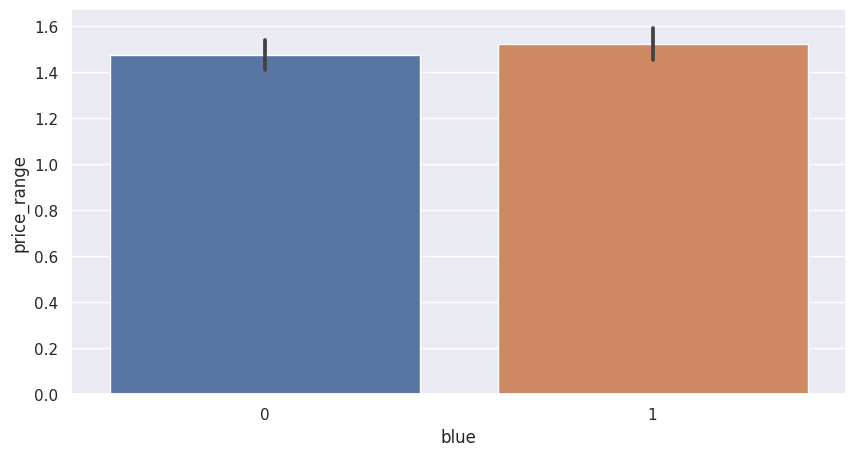

In [181]:
#3. Bluetooth

#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

**Why Bar chart** - when you are showing classes of information

**Insight** - half the devices have Bluetooth, and half don’t.

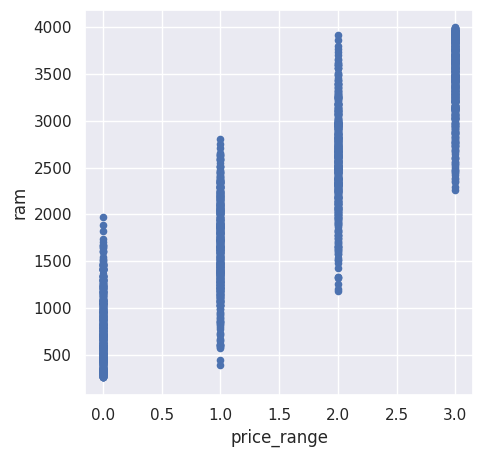

In [182]:
# 4. RAM

df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

**Why Scatter plot** - To See the trend in prices when RAM increses/decreses.

**Insight** - RAM has continuously increasing with price range while moving from Low cost to Very high cost


<Axes: xlabel='price_range', ylabel='int_memory'>

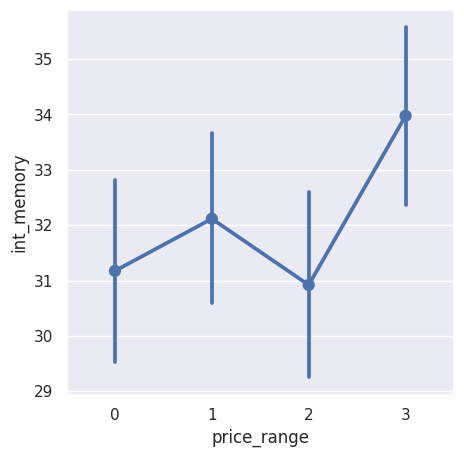

In [183]:
# 5. Internal Memory vs Price Range

sns.pointplot(x="price_range",y="int_memory",  data=df)

**Why Point Plot** - A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

**Insight** -  Here we can see that when we go towards low cost to high cost,there is same internal memory(somwhere arount=31) , but for Internal memory=34 price is sharply increases to Very high cost.

<Axes: xlabel='price_range', ylabel='battery_power'>

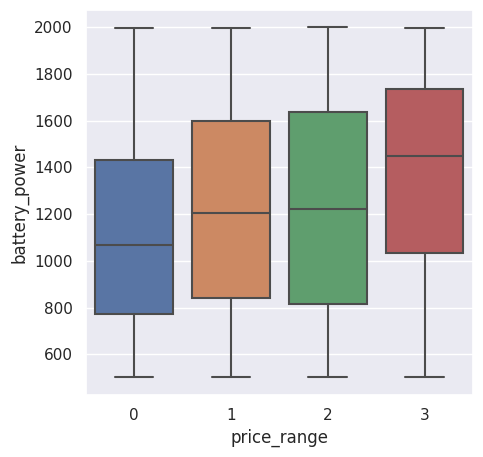

In [184]:
# 6. Battery power vs Price Range

sns.boxplot(x="price_range", y="battery_power", data=df)

**Why Box Plot** - It is provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

**Insight** - When we are increasing the battery_power the Price is simaltaneously Incresing and median is also increasing.
but for same battery_power(1200 MAH) the median of price range is same.

**Why KDE plot** -  Plot the data against a single/univariate variable.

**Insight** - Costly phones are lighter

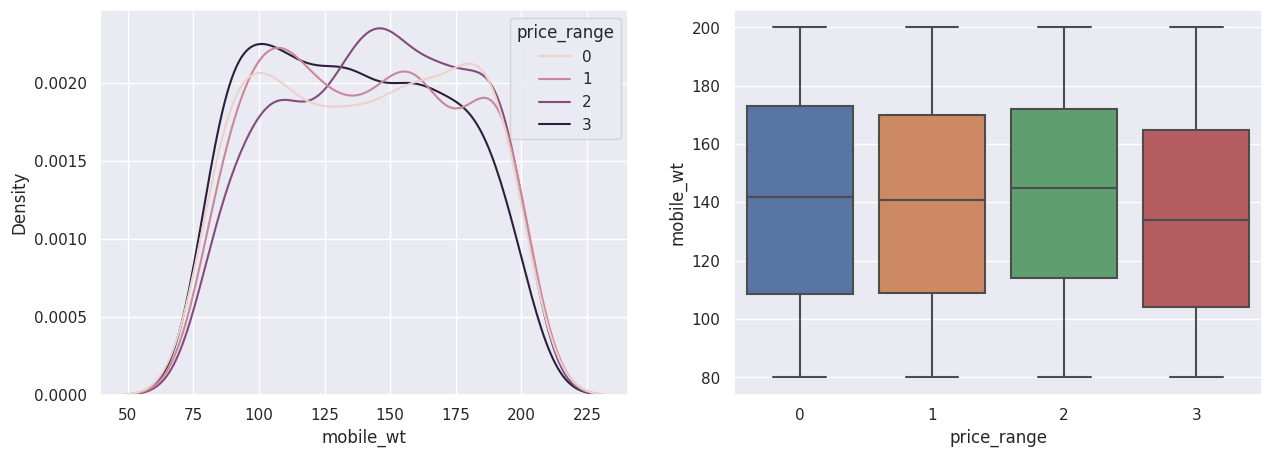

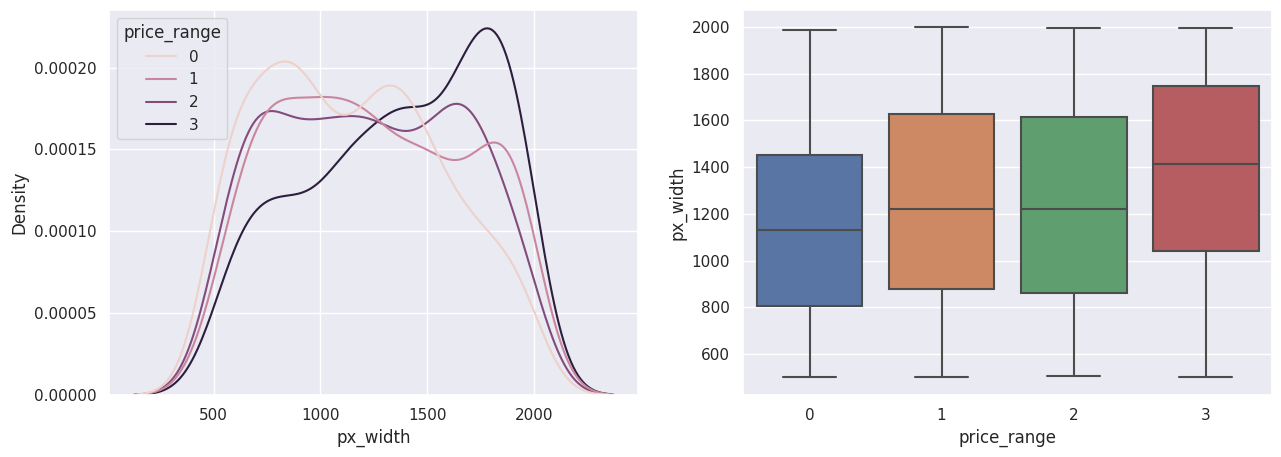

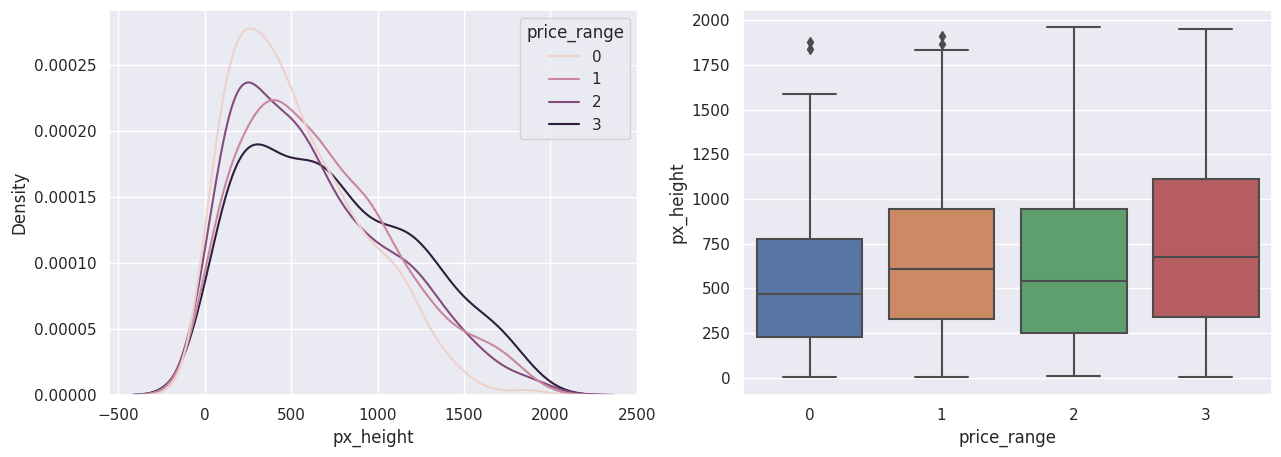

In [185]:
# 7.Mobile weight ,Pixel_width and pixel height vs price ranges

# subplots function with the arguments 1, 2 to indicate one row and two columns
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])

plt.show()

**Why KDE plot** -  Plot the data against a single/univariate variable.

**1. Insight for mobile weight** - Costly phones are lighter

**2. Insight for px_width** - There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

**3. Insight for px_height** - Pixel height is almost similar as we move from Low cost to Very high cost,little variation in pixel_height.

Text(0.5, 0, 'MegaPixels')

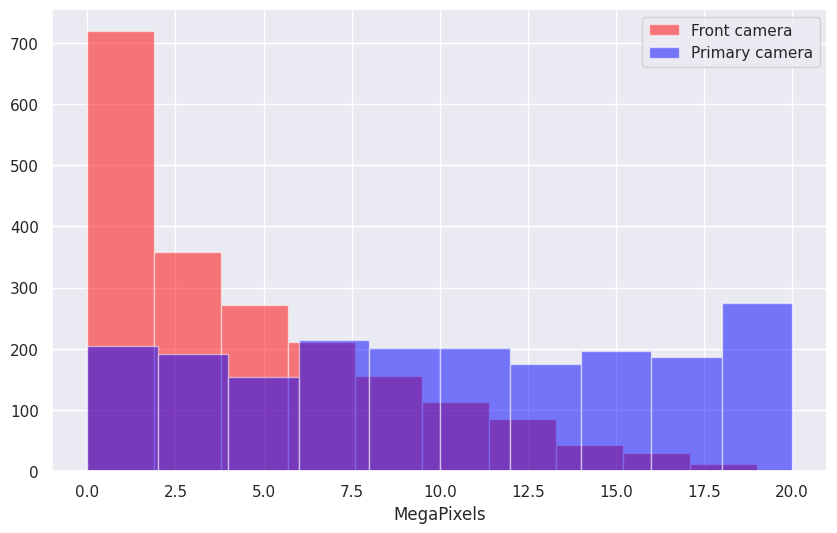

In [186]:
#8. No of Phones vs Camera megapixels of front and primary camera

plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='red',label='Front camera')
df['pc'].hist(alpha=0.5,color='blue',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

**Why this graph** -  It is used to summarize discrete or continuous data that are measured on an interval scale.

**Insights** - In this Histogram we can see that front camera phones with less pixels are more in numbers compare to primary camera, as we increase pixels we can see that primary camera phones are more in numbers but front camera mobile are very less(nearly zero).

## **Outliers Detection**

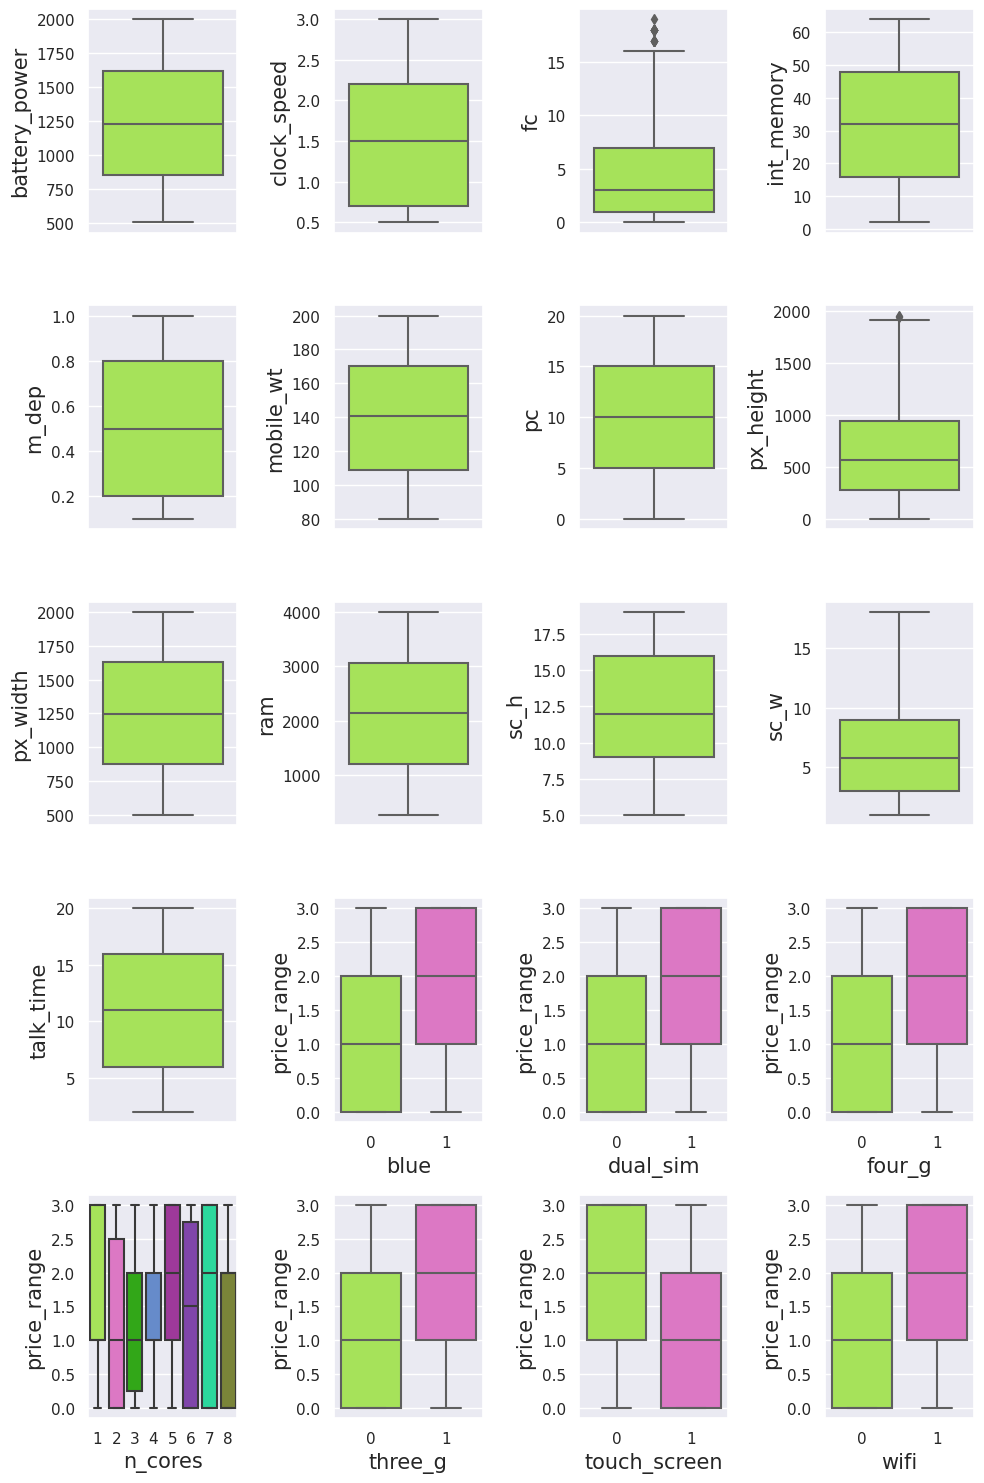

In [187]:
# outlier plots for both continues and categorical features:

sns.set_style('darkgrid')
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da','#af28aa','#8236ba','#0ff5a6','#83912c']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([num_columns,cat_columns])

fig, ax = plt.subplots(5, 4, figsize=(10,15),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<13:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='price_range', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

#### **Insight** - We can see that there is an outliers in column 'fc' and in 'px_height',so we are going to remove those rows having outliers using IQR method.

In [188]:
# Define function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

# Remove outliers in column A of the dataframe
remove_outliers_iqr(df, 'fc')


In [189]:
df.shape #shape of data after removing outliers

(1982, 21)

**Insight** -  Here we can see that using IQR method we have eliminated outliers.

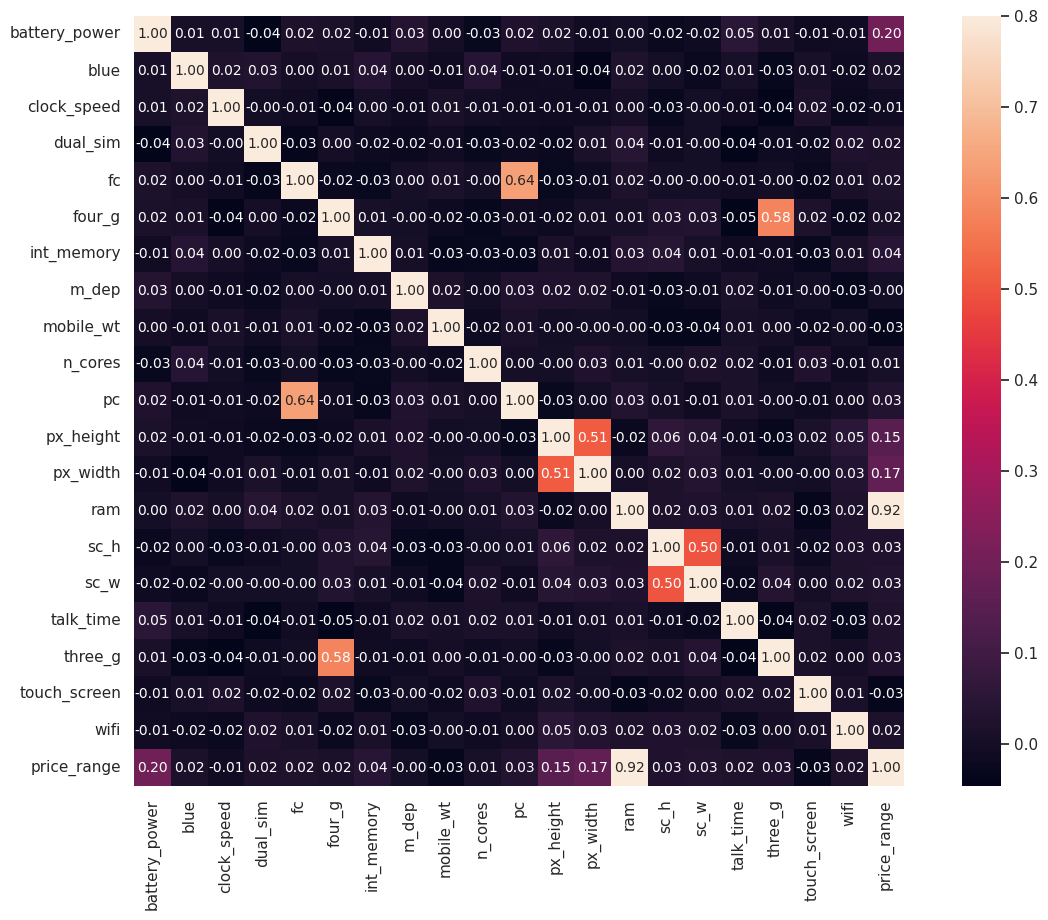

In [190]:
# Corelation Heat map
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

**Insights** - 

1 . RAM and price_range shows high correlation(0.92) which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

2 . There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

3 . We can conclude that if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature.

4.Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.


In [191]:
#Assigning new variable px_area
df['px_area']= df['px_width']*df['px_height']

# After assigning new variable now we can drop the px_width and px_height features

df.drop(['px_width','px_height' ], axis=1, inplace=True)

In [192]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,px_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7.0,19,0,0,1,1,15120.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3.0,7,1,1,0,2,1799140.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2.0,9,1,1,0,2,2167308.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8.0,11,1,0,0,2,2171776.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2.0,15,1,1,0,1,1464096.0


## Sclaing and splitting of the data of data :-

In [193]:
# Since all the features are in different range so we are going to use some Scaling technique
from sklearn.preprocessing import StandardScaler  # Z-score normalization( z=(x-u)/st.dev)
scaling = StandardScaler()    # Initialization

#This scaling technique of standard normal distribution(Gaussian with 0 mean and unit variance)

In [194]:
# Now we are going to Split our dataset into train test
X = df.drop(['price_range'], axis=1)
y = df['price_range']

print(X.columns)
y.head()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'px_area'],
      dtype='object')


0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [195]:
X.shape, y.shape

((1982, 19), (1982,))

In [196]:
# Scaling the values of X

X_scaling = scaling.fit_transform(X)

# Splitting dataset into train and test sets (train=75%, test=25%)

X_train, X_test, y_train, y_test = train_test_split(X_scaling , y, test_size=0.25, random_state=43)

In [197]:
print(X_train.shape)
print(y_train.shape)

(1486, 19)
(1486,)


## Modelling


####1. Logistic Regression  (Used for classification and predictive analytics)

In [198]:
# Simple Logistic regression model with scaled features

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [199]:
# Prediction

from sklearn.metrics import classification_report

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

print("")
print("")

print(classification_report(y_test_pred, y_test))

Train Set Accuracy:95.28936742934052
Test Set Accuracy:92.94354838709677

Confusion Matrix:
[[120   4   0   0]
 [  4 109  11   0]
 [  0   4 111   4]
 [  0   0   8 121]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       124
           1       0.93      0.88      0.90       124
           2       0.85      0.93      0.89       119
           3       0.97      0.94      0.95       129

    accuracy                           0.93       496
   macro avg       0.93      0.93      0.93       496
weighted avg       0.93      0.93      0.93       496



**Insight** - It is a good model that we are getting 95.29% train accuracy and 92.94% Test Accuracy, also we are getting good result in precision, recall and in F1 Score.


###2. Support Vector Classification (SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks)

In [200]:
from sklearn.svm import SVC
#SVC classifier boject
svm_c = SVC()

# Fit the classifier to the training data
svm_c.fit(X_train,y_train)

#FInding the accuracy
y_train_pred = svm_c.predict(X_train)
y_test_pred = svm_c.predict(X_test)

# Print the % accuracy with confusion matrix
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:98.1157469717362
Test Set Accuracy:86.08870967741935

Confusion Matrix:
[[112   6   0   0]
 [ 12 100  19   0]
 [  0  11 102  12]
 [  0   0   9 113]]


**Insight** - This is overfitting the data because train accuracy is high compare to Test accuracy.

### 3. KNN- K- Nearest Neighbor (Classifier implementing the k-nearest neighbors vote.)

In [201]:
# Initalizing the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

#FInding the accuracy
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Print the % accuracy with confusion matrix
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))



Train Set Accuracy:69.71736204576044
Test Set Accuracy:48.38709677419355

Confusion Matrix:
[[83 40 17  3]
 [34 53 48 22]
 [ 6 18 44 40]
 [ 1  6 21 60]]


**Insight** - Here we can see that Test and train accuracy very low, so we are going to use Hyperparameter tunning.

##Hyperparameter Tunning

In [202]:
# Using GridSearchCV -using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance

# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [203]:
# Best Score for KNN
knn_cv.best_score_


0.41977584408314883

In [204]:
# KNN Parameters
knn_cv.best_params_


{'n_neighbors': 1}

**Insight**  -  Using this GridSearchCV function and cross validation we are getting worst result.

### 4. Naive bays classifiers (Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms.)

In [205]:
from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes classifier object
naive = GaussianNB()

# Train the classifier using the training data
naive.fit(X_train, y_train)

# Predict the target values for the test data
y_train_pred = naive.predict(X_train)
y_test_pred = naive.predict(X_test)

# Print the % accuracy with confusion matrix
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

print("\n")

# Print the classification report for train and test
print(classification_report(y_test_pred,y_test))
print("\n")
print(classification_report(y_train_pred,y_train))


Train Set Accuracy:81.09017496635262
Test Set Accuracy:79.23387096774194

Confusion Matrix:
[[114  12   0   0]
 [ 10  92  27   0]
 [  0  13  83  21]
 [  0   0  20 104]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       126
           1       0.79      0.71      0.75       129
           2       0.64      0.71      0.67       117
           3       0.83      0.84      0.84       124

    accuracy                           0.79       496
   macro avg       0.79      0.79      0.79       496
weighted avg       0.80      0.79      0.79       496



              precision    recall  f1-score   support

           0       0.91      0.91      0.91       373
           1       0.72      0.75      0.73       363
           2       0.74      0.70      0.72       387
           3       0.88      0.90      0.89       363

    accuracy                           0.81      1486
   macro avg       0.81      0.81      0.81      1486
weighted avg

**Insight** - This Gaussian Naive bayes Model doing Decent because we are seeing here good accuracy percentage which represent that here no overfitting and diffrence between train and test accuracy is very low.

 ### 5. Random Forest Classifiers (Random forests tree classifiers and are an ensemble method, meaning they combine predictions from other models.)

In [206]:
# Train a Random Forest model
ran = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=3)
ran.fit(X_train, y_train)

# Train the classifier using the training data
ran.fit(X_train, y_train)

# Predict the target values for the test data 
y_train_pred = ran.predict(X_train)
y_test_pred = ran.predict(X_test)

# Print the % accuracy with confusion matrix
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:83.51278600269178
Test Set Accuracy:80.04032258064517

Confusion Matrix:
[[121  18   0   0]
 [  3  89  30   0]
 [  0  10  67   5]
 [  0   0  33 120]]


**Insight** - Here we can see that train accuracy is 83.51% but test accuracy is 80% which means we can say that our model is doing good and we know that decision tree or any ensemble techniques are very greedy and prone to overfitting, to avoid overfitting we use max_depth = 3.

##6. XGBoost( is just an extension of gradient boosting)

In [207]:
import xgboost as xgb
# Define the XGBoost classifier model
xg= xgb.XGBClassifier(n_estimators=500, random_state=42, max_depth=3)


# Train the classifier using the training data
xg.fit(X_train, y_train)

# Predict the target values for the test data 
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

# Print the % accuracy with confusion matrix
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))


Train Set Accuracy:100.0
Test Set Accuracy:89.31451612903226

Confusion Matrix:
[[119   5   0   0]
 [  5 105  15   0]
 [  0   7 104  10]
 [  0   0  11 115]]


In [208]:
# Hyperparameter tuning

xg= xgb.XGBClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
xg = GridSearchCV(xg, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [209]:
# XGBoost Parameters
xg.best_params_

{'max_depth': 3, 'n_estimators': 50}

## Insight:
Even after tuning our XGBoost model's hyperparameter, it still does not perform well and still overfitted.(it even performs worse than our KNN model). Now, we can be sure that we've selected the best model. Finally, we'll evaluate our best performing model (KNN) using other metrics!

## Feature Selection 

In [210]:
# getting weights of all the features used in the data
feature_importance = ran.feature_importances_
feature_importance

array([0.11660469, 0.0017462 , 0.01607973, 0.0017647 , 0.01488044,
       0.00119354, 0.02352313, 0.01413147, 0.03042578, 0.0104386 ,
       0.01707456, 0.60061736, 0.02063191, 0.02796603, 0.01585667,
       0.00140168, 0.0020785 , 0.00170001, 0.08188498])

In [211]:
# features used
column=X.columns

# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':column, 'Values':feature_importance})
feature_importance_df.sort_values(by =['Values'] ,ascending =False, inplace=True)
feature_importance_df

,Features,Values
11,ram,0.600617
0,battery_power,0.116605
18,px_area,0.081885
8,mobile_wt,0.030426
13,sc_w,0.027966
6,int_memory,0.023523
12,sc_h,0.020632
10,pc,0.017075
2,clock_speed,0.016080
14,talk_time,0.015857


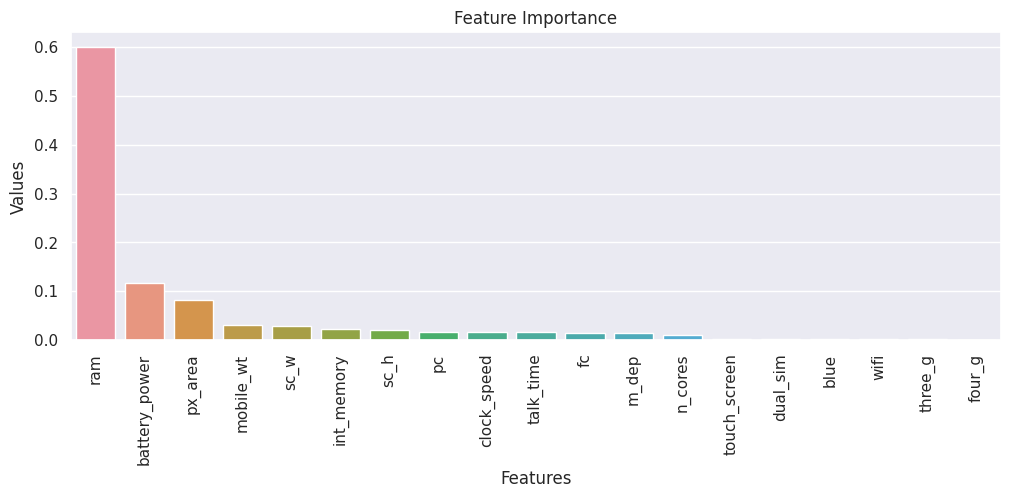

In [212]:
# Feature Importance
plt.figure(figsize=(12,4))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

## Conclusion
* From EDA we can see that here are mobile phones in 4 price ranges. 
* RAM contributing more than any features for price ranges, and we can see that whenever we are increasing RAM price is linearly incresing.
* Half the devices have Bluetooth, and half don’t
* For Internal memory=34 price is sharply increases to Very high cost.
* Costly phones are lighter
* RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
* From all the above experiments we can conclude that logistic regression,Naive Bayes and, Random Forest Classifier with using hyperparameters we got the best results